# Data preparation / Model

The purpose of this notebook is to prepare the image data aswell as define and train the model.

## Configuration

This unit imports necessary libraries and defines settings for the model. It also validates the dataset.

In [65]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense, BatchNormalization, MaxPooling2D
import cv2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Vars

BATCH_SIZE = 4
EPOCHS = 10
MODEL_NAME = 'model_batch_4'
LOSS = 'binary_crossentropy'
METRICS = ['accuracy']

ROOT_DIR = os.path.dirname(os.getcwd())
DATASET_DIR = os.path.join(ROOT_DIR, 'dataset')
IMAGES_DIR = os.path.join(ROOT_DIR, 'assets', 'images')
DIRS = [os.path.join(ROOT_DIR, DATASET_DIR, dir) for dir in os.listdir(DATASET_DIR)]
male_dirs = [os.path.join(dir, 'male') for dir in DIRS]
female_dirs = [os.path.join(dir, 'female') for dir in DIRS]
ALL_DIRS = male_dirs + female_dirs

save_figure = lambda filename: plt.savefig(os.path.join(IMAGES_DIR, filename))

In [9]:
# Make sure all images are jpg or png

male_dirs = [os.path.join(dir, 'male') for dir in DIRS]
female_dirs = [os.path.join(dir, 'female') for dir in DIRS]
all_dirs = male_dirs + female_dirs

invalid_images = 0

for dir in all_dirs:
    for img in os.listdir(dir):
        if not img.endswith('.jpg') or img.endswith('.png'):
            invalid_images += 1

print(f'Invalid images: {invalid_images}')

Invalid images: 0


## Read data

This unit reads in the dataset created by the DataCollection notebook. It also shuffles the dataset and plots a sample.

In [10]:
# Read images

male_train_pics = []
female_train_pics = []

male_train_pics = []
female_train_pics = []

male_train_pics = []
female_train_pics = []

for count, dir in enumerate(DIRS):
    
    for img_file in os.listdir(dir):
        img = cv2.imread(os.path.join(dir, img_file))  # Read image as NumPy array
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, (200, 200))  # Resize image to 200x200
        img = img / 255  # Normalize image
        male_pics.append(img) if count == 0 else female_pics.append(img)  # Append image to appropriate list

error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [43]:
# Create labels

male_genders = [1] * len(male_pics)
female_genders = [0] * len(female_pics)

In [44]:
# Create dataframe
data = {
    'image' : male_pics + female_pics,
    'gender' : male_genders + female_genders
}

df = pd.DataFrame(data=data)
df.head()

,image,gender
0,"[[[0.996078431372549, 1.0, 0.9803921568627451]...",1
1,"[[[0.7843137254901961, 0.6941176470588235, 0.5...",1
2,"[[[0.3176470588235294, 0.15294117647058825, 0....",1
3,"[[[0.058823529411764705, 0.06666666666666667, ...",1
4,"[[[0.9529411764705882, 1.0, 1.0], [0.952941176...",1


In [45]:
# Shuffle data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

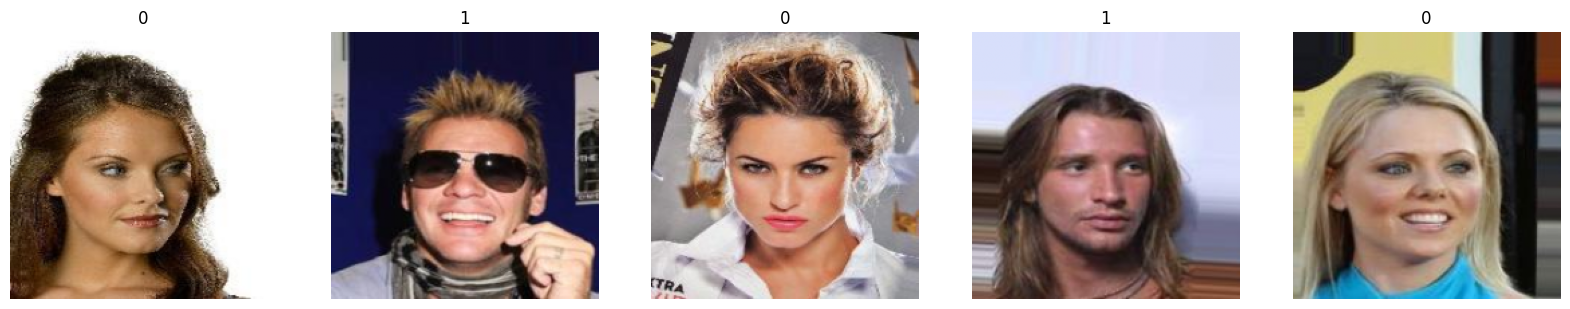

In [46]:
# Plot 5 images
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    ax[i].imshow(df['image'][i])
    ax[i].axis('off')
    ax[i].set_title(df['gender'][i])
plt.show()

## Prepare data

__This unit prepares the data using the following steps:__

    - Split data into train, test and validation
    - Defines X and y variables from dataset
    - One-hot encodes the y variables
    - Creates tensorflow datasets
    - Batches the tensorflow datasets

In [47]:
# Split dataset into train, test, val
X = df['image'].values
y = df['gender']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Read train, test, val images into numpy arrays, store them in X_train, X_test, X_val and labels into y respectively

In [13]:
train_imgs = []
train_labels = []

test_imgs = []
test_labels = []

val_imgs = []
val_labels = []

# Read images and numpy arrays and append to lists
for dir in ALL_DIRS:
    for file in os.listdir(dir):
        img = cv2.imread(os.path.join(dir, file))  # Read image as NumPy array
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, (200, 200))  # Resize image to 200x200
        img = img / 255  # Normalize image
        # Append image to appropriate list
        if 'train' in dir:
            train_imgs.append(img)
        elif 'test' in dir:
            test_imgs.append(img)
        elif 'val' in dir:
            val_imgs.append(img)

# Create labels

for dir in DIRS:
    if 'train' in dir:
        male_labels = [1] * len(os.listdir(os.path.join(dir, 'male')))
        female_labels = [0] * len(os.listdir(os.path.join(dir, 'female')))
        train_labels = male_labels + female_labels
    elif 'test' in dir:
        male_labels = [1] * len(os.listdir(os.path.join(dir, 'male')))
        female_labels = [0] * len(os.listdir(os.path.join(dir, 'female')))
        test_labels = male_labels + female_labels
    elif 'val' in dir:
        male_labels = [1] * len(os.listdir(os.path.join(dir, 'male')))
        female_labels = [0] * len(os.listdir(os.path.join(dir, 'female')))
        val_labels = male_labels + female_labels

In [17]:
X_train = train_imgs
y_train = train_labels

X_test = test_imgs
y_test = test_labels

X_val = val_imgs
y_val = val_labels

In [18]:
# Flatten and reshape arrays for tensorflow data api

# Flatten arrays
X_train = np.array([image.flatten() for image in X_train])
X_test = np.array([image.flatten() for image in X_test])
X_val = np.array([image.flatten() for image in X_val])

# Reshape arrays
X_train = X_train.reshape(-1, 200, 200, 3)
X_test = X_test.reshape(-1, 200, 200, 3)
X_val = X_val.reshape(-1, 200, 200, 3)

In [19]:
# One hot encode labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y=y_train, num_classes=2)
y_test = to_categorical(y=y_test, num_classes=2)
y_val = to_categorical(y=y_val, num_classes=2)

In [20]:
# Create tensorflow datasets

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

2023-10-11 10:52:50.035705: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1728000000 exceeds 10% of free system memory.


In [21]:
def apply_augmentation(image, label):
    # Apply image augmentation operations
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    # Add more augmentation operations as needed

    return image, label

# Apply data augmentation to the train dataset
train_dataset = train_dataset.map(apply_augmentation)

In [22]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

# Image augmentation

## Define model

This unit defines the model architecture and compiles the model using provided settings.

In [81]:
def create_model(learning_rate, hidden_layer_size, filters, dropout):
    # Pull in vars
    global BATCH_SIZE
    global LOSS
    global METRICS

    # Define model architecture
    model = Sequential()

    model.add(Conv2D(filters[0], (3, 3), 1, activation='relu', input_shape=(200, 200, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(dropout[0]))

    model.add(Conv2D(filters[1], (3, 3), 1, activation='relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(filters[1], (3, 3), 1, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(dropout[0]))

    model.add(Conv2D(filters[2], (3, 3), 1, activation='relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(filters[2], (3, 3), 1, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(dropout[1]))

    model.add(Flatten())
    model.add(Dense(hidden_layer_size, activation='relu'))

    model.add(Dense(2, activation='sigmoid'))

    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=LOSS, metrics=METRICS)
    
    return model

In [82]:
model = KerasClassifier(model=create_model, learning_rate=0.001, hidden_layer_size=128, filters=(16, 32, 64), dropout=(0.1, 0.3))

In [89]:
param_grid = {
    'hidden_layer_size': [256, 512],
    'learning_rate': [0.01, 0.001],
    'filters': [(8, 16, 32), (16, 32, 64)],
    'dropout': [(0.1, 0.3), (0.25, 0.5)]
}

In [90]:
search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=4,
)

In [91]:
search.fit(X_train, y_train)

57/57 [==============================] - 35s 570ms/step - loss: 1.0024 - accuracy: 0.7350


GridSearchCV(cv=4,
             estimator=KerasClassifier(dropout=(0.1, 0.3), filters=(16, 32, 64), hidden_layer_size=128, learning_rate=0.001, model=<function create_model at 0x7ff438befce0>),
             param_grid={'dropout': [(0.1, 0.3), (0.25, 0.5)],
                         'filters': [(8, 16, 32), (16, 32, 64)],
                         'hidden_layer_size': [256, 512],
                         'learning_rate': [0.01, 0.001]})

In [92]:
best_params = search.best_params_

In [93]:
best_params

{'dropout': (0.1, 0.3),
 'filters': (8, 16, 32),
 'hidden_layer_size': 256,
 'learning_rate': 0.001}

In [52]:
# Define model architecture

# model = Sequential()

# model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(200, 200, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), 1, activation='relu'))
# model.add(BatchNormalization())

# model.add(Conv2D(32, (3, 3), 1, activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), 1, activation='relu'))
# model.add(BatchNormalization())

# model.add(Conv2D(64, (3, 3), 1, activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.5))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))

# model.add(Dense(2, activation='sigmoid'))

In [53]:
# Compile model

# model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

## Train model

This unit trains the model on the dataset and saves it.

In [54]:
hist = model.fit(train_dataset, epochs=EPOCHS, steps_per_epoch = len(X_train) // BATCH_SIZE, validation_data=val_dataset)

Epoch 1/10
525/525 [==============================] - 164s 307ms/step - loss: 1.2483 - accuracy: 0.7857 - val_loss: 0.3246 - val_accuracy: 0.8756
Epoch 2/10
525/525 [==============================] - 117s 223ms/step - loss: 0.2273 - accuracy: 0.9124 - val_loss: 0.3286 - val_accuracy: 0.8978
Epoch 3/10
525/525 [==============================] - 132s 253ms/step - loss: 0.1797 - accuracy: 0.9329 - val_loss: 0.4018 - val_accuracy: 0.8933
Epoch 4/10
525/525 [==============================] - 82s 156ms/step - loss: 0.1712 - accuracy: 0.9400 - val_loss: 0.9882 - val_accuracy: 0.8511
Epoch 5/10
525/525 [==============================] - 81s 155ms/step - loss: 0.1387 - accuracy: 0.9424 - val_loss: 0.3826 - val_accuracy: 0.9089
Epoch 6/10
525/525 [==============================] - 80s 152ms/step - loss: 0.1276 - accuracy: 0.9590 - val_loss: 0.4652 - val_accuracy: 0.9044
Epoch 7/10
525/525 [==============================] - 91s 173ms/step - loss: 0.1987 - accuracy: 0.9500 - val_loss: 0.4146 - val

In [55]:
model.save(os.path.join(ROOT_DIR, f'{MODEL_NAME}.h5'))

/workspace/.pyenv_mirror/user/3.11.6/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Store metrics from history
training_accuracy = hist.history['accuracy']
training_loss = hist.history['loss']
validation_accuracy = hist.history['val_accuracy']
validation_loss = hist.history['val_loss']

# Calculate epochs
epochs = range(1, len(training_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
save_figure('metrics_over_epochs.png')  # Save figure
plt.show()

## Evaluate model

This unit evaluates the model on the test dataset to provide metrics on data which the model has never seen.

In [56]:
loss, accuracy = model.evaluate(test_dataset)

  9/113 [=>............................] - ETA: 1s - loss: 0.2771 - accuracy: 0.8889

113/113 [==============================] - 2s 14ms/step - loss: 0.2921 - accuracy: 0.9222


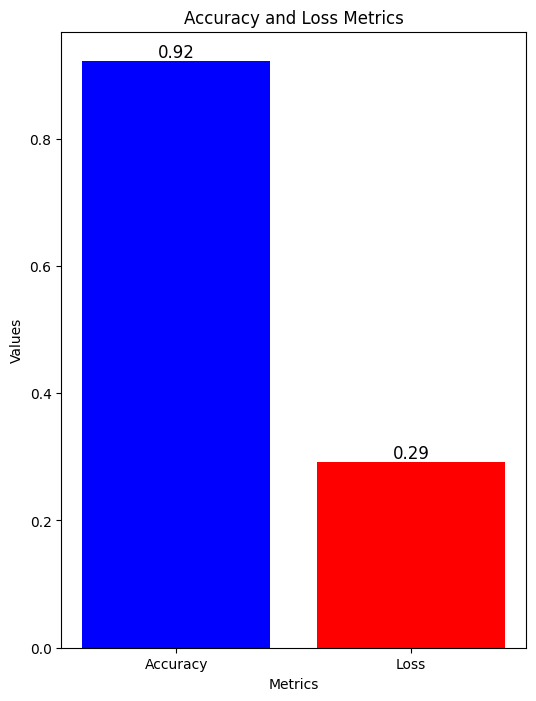

In [64]:
plt.figure(figsize=(6, 8))

# Bar plot for accuracy and loss
metrics = ['Accuracy', 'Loss']
values = [accuracy, loss]

plt.bar(metrics, values, color=['blue', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')

# Display the values on the bars
for i in range(len(metrics)):
    plt.text(i, values[i], f'{values[i]:.2f}', ha='center', va='bottom', fontsize=12)

plt.title('Accuracy and Loss Metrics')
save_figure('evaluation_metrics.png')  # Save figure
plt.show()


# Confusion matrix and classification report

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

In [ ]:
target_names = ['male', 'female']

print(classification_report(y_true, y_pred, target_names=target_names))